In [1]:
# 参考 https://qiita.com/tubarin/items/774b61ffbde17c7df89a

In [2]:
import numpy as np
import pandas as pd
import pulp
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=1, suppress = True)

In [3]:
problem = pulp.LpProblem("TravelingSalesmanProblem", pulp.LpMinimize)

In [4]:
N = 15

In [5]:
df = pd.DataFrame({"x":np.random.randint(20, 90, N), 
                   "y":np.random.randint(20, 90, N), 
                   })
df.iloc[0].x = 0
df.iloc[0].y = 0
df

,x,y
0,0,0
1,40,80
2,69,64
3,30,22
4,48,37
5,72,24
6,68,43
7,84,61
8,43,39
9,85,61


In [6]:
distance = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index).values
distance

array([[  0. ,  89.4,  94.1,  37.2,  60.6,  75.9,  80.5, 103.8,  58.1,
        104.6,  87.2, 117.4,  93.4,  41.7,  51.6],
       [ 89.4,   0. ,  33.1,  58.9,  43.7,  64.5,  46.4,  47.9,  41.1,
         48.8,   3.2,  41.3,  25.5,  52. ,  50. ],
       [ 94.1,  33.1,   0. ,  57.3,  34.2,  40.1,  21. ,  15.3,  36.1,
         16.3,  30.9,  24.2,   7.8,  52.4,  43.4],
       [ 37.2,  58.9,  57.3,   0. ,  23.4,  42. ,  43.4,  66.6,  21.4,
         67.4,  56.1,  81.1,  57.4,   7. ,  14.4],
       [ 60.6,  43.7,  34.2,  23.4,   0. ,  27.3,  20.9,  43.3,   5.4,
         44.1,  40.6,  58.2,  35.3,  19.7,   9.2],
       [ 75.9,  64.5,  40.1,  42. ,  27.3,   0. ,  19.4,  38.9,  32.6,
         39.2,  61.4,  61.7,  45.9,  42.3,  30.6],
       [ 80.5,  46.4,  21. ,  43.4,  20.9,  19.4,   0. ,  24.1,  25.3,
         24.8,  43.4,  44. ,  26.5,  40.5,  29.1],
       [103.8,  47.9,  15.3,  66.6,  43.3,  38.9,  24.1,   0. ,  46.5,
          1. ,  45.9,  24.2,  22.5,  62.8,  52.2],
       [ 58.1,  41.1,  3

(-10.0, 110.0)

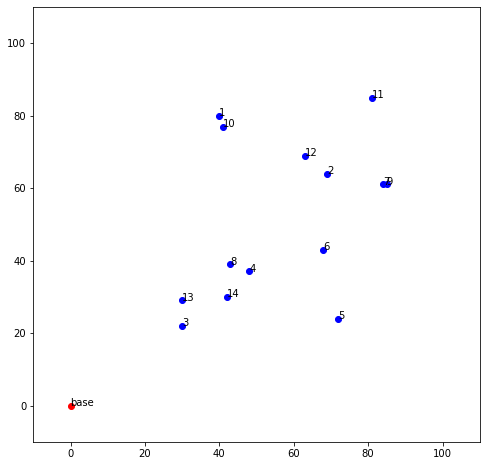

In [7]:
plt.figure(figsize=(8, 8))
for i in range(N):    
    if i == 0:
        plt.scatter(df.x[i], df.y[i], c='r')
        plt.text(df.x[i], df.y[i], "base")
    else:
        plt.scatter(df.x[i], df.y[i], c='b')
        plt.text(df.x[i], df.y[i], str(i))
plt.xlim([-10, 110])
plt.ylim([-10, 110])

In [8]:
#リストのリストにすることで、あとでxを呼び出すときに[i][j]で呼び出せるようにしている
x = [[pulp.LpVariable("x(%s,%s)"%(i, j), cat="Binary") for i in range(N)] for j in range(N)]
x

[[x(0,0),
  x(1,0),
  x(2,0),
  x(3,0),
  x(4,0),
  x(5,0),
  x(6,0),
  x(7,0),
  x(8,0),
  x(9,0),
  x(10,0),
  x(11,0),
  x(12,0),
  x(13,0),
  x(14,0)],
 [x(0,1),
  x(1,1),
  x(2,1),
  x(3,1),
  x(4,1),
  x(5,1),
  x(6,1),
  x(7,1),
  x(8,1),
  x(9,1),
  x(10,1),
  x(11,1),
  x(12,1),
  x(13,1),
  x(14,1)],
 [x(0,2),
  x(1,2),
  x(2,2),
  x(3,2),
  x(4,2),
  x(5,2),
  x(6,2),
  x(7,2),
  x(8,2),
  x(9,2),
  x(10,2),
  x(11,2),
  x(12,2),
  x(13,2),
  x(14,2)],
 [x(0,3),
  x(1,3),
  x(2,3),
  x(3,3),
  x(4,3),
  x(5,3),
  x(6,3),
  x(7,3),
  x(8,3),
  x(9,3),
  x(10,3),
  x(11,3),
  x(12,3),
  x(13,3),
  x(14,3)],
 [x(0,4),
  x(1,4),
  x(2,4),
  x(3,4),
  x(4,4),
  x(5,4),
  x(6,4),
  x(7,4),
  x(8,4),
  x(9,4),
  x(10,4),
  x(11,4),
  x(12,4),
  x(13,4),
  x(14,4)],
 [x(0,5),
  x(1,5),
  x(2,5),
  x(3,5),
  x(4,5),
  x(5,5),
  x(6,5),
  x(7,5),
  x(8,5),
  x(9,5),
  x(10,5),
  x(11,5),
  x(12,5),
  x(13,5),
  x(14,5)],
 [x(0,6),
  x(1,6),
  x(2,6),
  x(3,6),
  x(4,6),
  x(5,6),
  x(

In [9]:
# uはA, B, C, D, Eが訪問される順番
u = [pulp.LpVariable("u(%s)"%(i), cat="Continuous", lowBound=1.0, upBound=(N)) for i in range(N)]
u

[u(0),
 u(1),
 u(2),
 u(3),
 u(4),
 u(5),
 u(6),
 u(7),
 u(8),
 u(9),
 u(10),
 u(11),
 u(12),
 u(13),
 u(14)]

In [10]:
# 目的関数
problem += pulp.lpSum(distance[i][j] * x[i][j] for i in range(N) for j in range(N) if i != j)

In [11]:
# lpSumの中でループして制約式作る、その制約式をN個作る
for i in range(N):
    problem += pulp.lpSum(x[i][j] for j in range(N) if i != j) == 1
    
for i in range(N):
    problem += pulp.lpSum(x[j][i] for j in range(N) if i != j) == 1

In [12]:
for i in range(N):
    problem += x[i][i] == 0

In [13]:
#部分巡回路MTZ条件
BigM = 10000
for i in range(N):
    for j in range(1,N):
        if i != j:
            # BigM使用の場合 https://qiita.com/panchovie/items/6509fb54e3d53f4766aa
            #problem += u[i] + 1.0 - BigM * (1.0 - x[i][j]) <= u[j]
            # 数理最適化第５章の場合
            problem += u[i] + 1.0 <= u[j] + (N-1)*(1.0 - x[i][j])


In [14]:
problem

TravelingSalesmanProblem:
MINIMIZE
89.44271909999159*x(0,1) + 87.23531395025755*x(0,10) + 117.41379816699569*x(0,11) + 93.43446901438462*x(0,12) + 41.72529209005013*x(0,13) + 51.61395160225576*x(0,14) + 94.11163583744573*x(0,2) + 37.20215047547655*x(0,3) + 60.60528029800704*x(0,4) + 75.8946638440411*x(0,5) + 80.45495634204272*x(0,6) + 103.81233067415451*x(0,7) + 58.05170109479997*x(0,8) + 104.62313319720452*x(0,9) + 89.44271909999159*x(1,0) + 3.1622776601683795*x(1,10) + 41.30375285612676*x(1,11) + 25.495097567963924*x(1,12) + 51.97114584074513*x(1,13) + 50.039984012787215*x(1,14) + 33.12099032335839*x(1,2) + 58.855755878248644*x(1,3) + 43.73785545725808*x(1,4) + 64.4980619863884*x(1,5) + 46.400431032480725*x(1,6) + 47.92702786528704*x(1,7) + 41.10960958218893*x(1,8) + 48.84669896727925*x(1,9) + 87.23531395025755*x(10,0) + 3.1622776601683795*x(10,1) + 40.792156108742276*x(10,11) + 23.40939982143925*x(10,12) + 49.24428900898052*x(10,13) + 47.01063709417264*x(10,14) + 30.870698080866262*

In [15]:
status = problem.solve()

In [16]:
print("Status: ", pulp.LpStatus[status])
print("Objective: ", problem.objective.value())

Status:  Optimal
Objective:  313.8028201669852


In [17]:
#　各ポイントを回る順番
for i in range(N):
    print(u[i], u[i].value())

u(0) 1.0
u(1) 12.0
u(2) 10.0
u(3) 2.0
u(4) 4.0
u(5) 5.0
u(6) 6.0
u(7) 7.0
u(8) 14.0
u(9) 8.0
u(10) 13.0
u(11) 9.0
u(12) 11.0
u(13) 15.0
u(14) 3.0


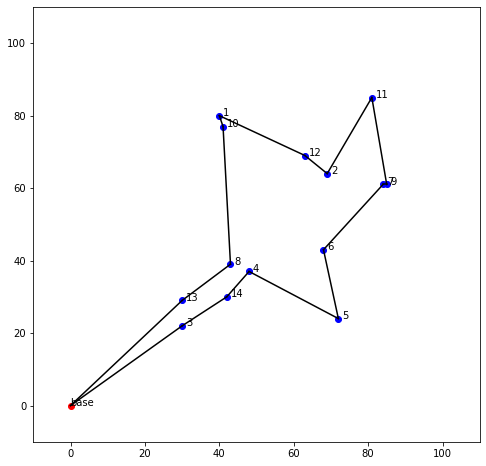

In [18]:
plt.figure(figsize=(8, 8))
for i in range(N):    
    if i == 0:
        plt.scatter(df.x[i], df.y[i], c='r')
        plt.text(df.x[i], df.y[i], "base")
    else:
        plt.scatter(df.x[i], df.y[i], c='b')
        plt.text(df.x[i]+1, df.y[i], str(i))
plt.xlim([-10, 110])
plt.ylim([-10, 110])


for i in range(N):
    for j in range(N):
        if i != j and pulp.value(x[i][j]) == 1:
            plt.plot([df.x[i], df.x[j]], [df.y[i], df.y[j]], c="black")